# Import libraries

In [2]:
# data processing libraries
import numpy as np
import pandas as pd


In [3]:
# plotting libraries
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
import datetime
from datetime import datetime as dt

In [5]:
# miscellaneous
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import normalize

In [6]:
import seaborn as sns

In [7]:
import random

In [8]:
import itertools

# Data exploration

## import the data

In [173]:
# Get data

days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
df = {}
for day in days:
    file_path = day + '.csv'
    df[day] = pd.read_csv(file_path,sep=';')


In [174]:
# format the data
# Make unique customer numbers throughout the week

df['monday']['customer_no'] = df['monday']['customer_no'] 
df['tuesday']['customer_no'] = df['tuesday']['customer_no'] + 2000
df['wednesday']['customer_no'] = df['wednesday']['customer_no'] + 4000
df['thursday']['customer_no'] = df['thursday']['customer_no'] + 6000
df['friday']['customer_no'] = df['friday']['customer_no'] + 8000

In [175]:
#create a dataframe with all the days
df_full = pd.concat([df['monday'], df['tuesday'], df['wednesday'], df['thursday'], df['friday']], ignore_index=True, axis=0)

## Calculate the total number of customers in each section

In [176]:
#a table with the the total number of customers that were in each section for all the timestamps
df_full['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

(array([4679.,    0., 3754.,    0.,    0., 5122.,    0., 7417.,    0.,
        3905.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

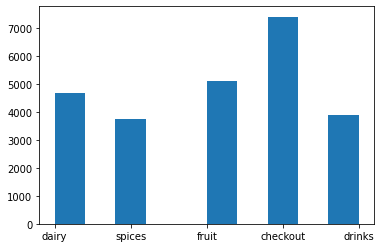

In [177]:
#a histogram plotting the the total number of customers that were in each section for all the timestamps
plt.hist(df_full['location'])

## Calculate the total number of customers in each section over time

In [178]:
df["monday"]

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [179]:
# group by each timestamp
ts = df_full.groupby('timestamp')

In [180]:
#create a table with a timestamp column and a column for each of the supermaket sections
df2 = df_full[0:0]
df2 = df2.drop(labels=["customer_no", "location"], axis = 1)
df2["dairy"]= np.nan
df2["spices"]= np.nan
df2["fruit"]= np.nan
df2["checkout"]= np.nan
df2["drinks"]= np.nan

df2


,timestamp,dairy,spices,fruit,checkout,drinks


In [181]:
#fill the dataframe with the data supplied by the company 
time_unique = df_full['timestamp'].unique()
for time in time_unique:
  dairy = 0
  spices = 0
  fruit = 0
  checkout = 0
  drinks = 0
  for el in ts.get_group(time)["location"]:
    if el == "dairy":
      dairy += 1
    if el == "spices":
      spices += 1
    if el == "fruit":
      fruit += 1
    if el == "checkout":
      checkout += 1
    if el == "drinks":
      drinks += 1
  df2.loc[len(df2.index)] = [time, dairy, spices, fruit, checkout, drinks]






In [182]:
#for each timestamp the number of customers for each supermarket section are listed in their resepctive columns
df2

,timestamp,dairy,spices,fruit,checkout,drinks
0,2019-09-02 07:03:00,2.0,0.0,0.0,0.0,0.0
1,2019-09-02 07:04:00,2.0,3.0,1.0,0.0,0.0
2,2019-09-02 07:05:00,1.0,0.0,0.0,2.0,1.0
3,2019-09-02 07:06:00,2.0,1.0,2.0,2.0,1.0
4,2019-09-02 07:07:00,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
4358,2019-09-06 21:46:00,0.0,0.0,4.0,0.0,1.0
4359,2019-09-06 21:47:00,1.0,0.0,1.0,2.0,0.0
4360,2019-09-06 21:48:00,3.0,0.0,2.0,2.0,0.0
4361,2019-09-06 21:49:00,2.0,1.0,0.0,0.0,1.0


# Display the number of customers at checkout over time

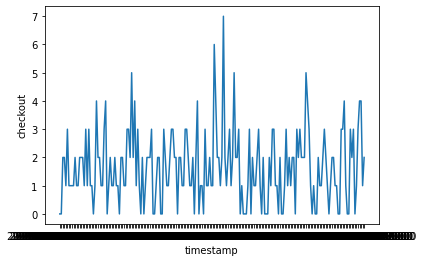

In [183]:
#plot the number of customers at the checkout for the first 200 timestamps
sns.lineplot(x= df2["timestamp"].head(200), y = df2["checkout"].head(200))

## Evaluate the arrival distribution of customers 

In [ ]:
#Get the time between arrivals
customer_unique2 = df['monday']["customer_no"].unique()
ts3 = df["monday"].groupby('customer_no')
arrival_times = []
for customer in customer_unique2:
  series1 = ts3.get_group(customer)["timestamp"]
  arrival_time = series1.iloc[0]
  arrival_times.append(arrival_time)
#print(arrival_times)

differences = []
while len(arrival_times)>2:
  first = datetime.datetime.strptime(arrival_times[0],"%Y-%m-%d %H:%M:%S")
  second = datetime.datetime.strptime(arrival_times[1],"%Y-%m-%d %H:%M:%S")
  #print(first)
  #print(second)
  diff = second-first
 # print(diff)
  diff = diff.total_seconds()
  if diff != 0:
    diff = diff/60
  arrival_times = arrival_times[1:]
  differences.append(diff)

differences





In [185]:
customer_unique2 = df['monday']["customer_no"].unique()
ts3 = df["monday"].groupby('customer_no')
arrival_times = []
ls1 = df["monday"]["timestamp"].unique()
df3 = pd.DataFrame(data = ls1,  
                  columns = ["timestamp"])
df3["arrival_n"] = 0
for customer in customer_unique2:
  series1 = ts3.get_group(customer)["timestamp"]
  arrival_time = series1.iloc[0]
  for i in df3.index:
    if df3["timestamp"][i] == arrival_time:
      df3["arrival_n"][i] += 1

  #arrival_time = datetime.datetime.strptime(arrival_time,"%Y-%m-%d %H:%M:%S")

  #arrival_times.append(arrival_time)



In [186]:
arrival_n_l = df3["arrival_n"].tolist()

In [187]:
np.mean(differences)

0.613840830449827

(array([933., 305., 111.,  57.,  23.,   8.,   4.,   1.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

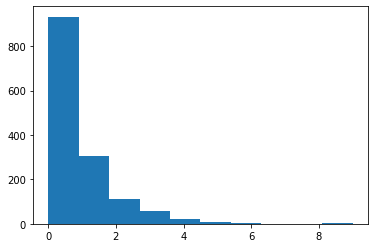

In [188]:
plt.hist(differences)

# Crosstabs

In [189]:
#create the dataframe for the befor after data
paths = pd.DataFrame(columns=['before','after'])
paths

,before,after


In [190]:
#fill the bevor-after table with the data supplied by the company for monday
ts2 = df_full.groupby('customer_no')
customer_unique = df_full["customer_no"].unique()
for customer in customer_unique:
  series1 = ts2.get_group(customer)["location"]
  while series1.size >= 2:
    before = series1.iloc[0]
    after = series1.iloc[1]
    paths.loc[len(paths.index)] = [before, after]
    series1 = series1.iloc[2:]
  



In [ ]:
#get the first choice of a customer when he enters the market and append it to first_choice
ts2 = df_full.groupby('customer_no')
customer_unique = df_full["customer_no"].unique()
first_choice =[]
for customer in customer_unique:
  series1 = ts2.get_group(customer)["location"]
  print(series1)
  first_choice.append(series1.iloc[0])





In [192]:
paths

,before,after
0,dairy,checkout
1,dairy,checkout
2,dairy,checkout
3,dairy,checkout
4,spices,checkout
...,...,...
11101,dairy,drinks
11102,fruit,checkout
11103,fruit,dairy
11104,dairy,checkout


In [193]:
transition_probs = pd.crosstab(paths['after'],paths['before'], normalize=1)
transition_probs

before,dairy,drinks,fruit,spices
after,,,,
checkout,0.388851,0.543326,0.498941,0.258552
dairy,0.000000,0.036066,0.242986,0.325633
drinks,0.227396,0.000000,0.131551,0.267881
fruit,0.185248,0.215457,0.000000,0.147934
spices,0.198504,0.205152,0.126522,0.000000


In [194]:
transition_probs["drinks"]["checkout"]

0.5433255269320844

# Monte Carlo simulation

## Create a customer class

In [195]:
#externl variables: transition_probs, first_choice

class Customer:
  id_iter = itertools.count()

  def __init__(self, state="entry", budget = 100, transition_probs = transition_probs):
    self.id = next(Customer.id_iter)
    self.state = state
    self.budget = budget

  def __repr__(self):
    return f'<Customer {self.id} in {self.state}>'
  
  def next_state(self):
    if self.state == "entry":
      self.state = random.choice(first_choice)
    else:
      state_before = self.state
      checkout = transition_probs[state_before]["checkout"]
      dairy = transition_probs[state_before]["dairy"]
      drinks = transition_probs[state_before]["drinks"]
      fruit = transition_probs[state_before]["fruit"]
      spices = transition_probs[state_before]["spices"]
      sections = ["checkout","dairy","drinks", "fruit","spices"]
      probabilities = [checkout, dairy, drinks, fruit, spices]
      draw = np.random.choice(sections, 1, p=probabilities)
      draw = draw[0]
      self.state = draw

  def is_active(self):
    if self.state == "checkout":
      False
    else:
      True

## Create customer instances

In [196]:
cust1 = Customer()
print(cust1)
cust1.next_state()
print(cust1)

cust2 = Customer()
print(cust2)
cust2.next_state()
print(cust2)
cust2.next_state()
print(cust2)
cust2.next_state()
print(cust2)


<Customer 0 in entry>
<Customer 0 in dairy>
<Customer 1 in entry>
<Customer 1 in drinks>
state before drinks
0.5433255269320844
[0.5433255269320844, 0.036065573770491806, 0.0, 0.2154566744730679, 0.20515222482435597]
['checkout', 'dairy', 'drinks', 'fruit', 'spices']
draw checkout
state after checkout
<Customer 1 in checkout>
state before checkout


KeyError: ignored

# Create a Supermarket class

In [197]:
from re import I

class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self):        
        # a list of Customer objects
        self.customers = []
        self.minutes = 0
        self.last_id = 0
        self.data = pd.DataFrame(columns=['timestamp','customer_no','location'])

    def __repr__(self):
        return f'{self.customers}'

    def get_time(self):
      m = self.minutes
      hours = 0
      while m >= 60:
        m = m - 60
        hours +=1
      return f'{hours}:{m}'

    def print_customers(self):
      for c in self.customers:
        print(c)


    def next_minute(self):
      Supermarket.remove_exitsting_customers(self)
      for i in range(len(self.customers)):
        self.customers[i].next_state()
      Supermarket.add_new_customers(self, random.choice(arrival_n_l))
      self.minutes += 1
    
    def add_new_customers(self, n):
      for i in range(n):
        self.customers.append(Customer(budget=random.randint(1, 100)))


    def remove_exitsting_customers(self):
      for i in range(len(self.customers)):
        print(self.customers[i])
        if self.customers[i].is_active() == False:
          self.customers.pop(i)

            



In [198]:

 sup = Supermarket()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)
 sup.next_minute()
 print(sup)



[]
[<Customer 2 in entry>, <Customer 3 in entry>, <Customer 4 in entry>, <Customer 5 in entry>]
<Customer 2 in entry>
<Customer 3 in entry>
<Customer 4 in entry>
<Customer 5 in entry>
[<Customer 2 in drinks>, <Customer 3 in drinks>, <Customer 4 in fruit>, <Customer 5 in dairy>, <Customer 6 in entry>, <Customer 7 in entry>]
<Customer 2 in drinks>
<Customer 3 in drinks>
<Customer 4 in fruit>
<Customer 5 in dairy>
<Customer 6 in entry>
<Customer 7 in entry>
state before drinks
0.5433255269320844
[0.5433255269320844, 0.036065573770491806, 0.0, 0.2154566744730679, 0.20515222482435597]
['checkout', 'dairy', 'drinks', 'fruit', 'spices']
draw checkout
state after checkout
state before drinks
0.5433255269320844
[0.5433255269320844, 0.036065573770491806, 0.0, 0.2154566744730679, 0.20515222482435597]
['checkout', 'dairy', 'drinks', 'fruit', 'spices']
draw fruit
state after fruit
state before fruit
0.4989412387506617
[0.4989412387506617, 0.24298570672313394, 0.13155108523028058, 0.0, 0.12652196929

KeyError: ignored